# Caso de aplicación: Diabetes 130-US Hospitales entre (1999 a 2008)

Este dataset representa 10 años (1999-2008) de atención clínica en 130 hospitales y redes integradas de prestación de servicios de EE. UU. Incluye más de 50 funciones que representan los resultados del paciente y del hospital. Se extrajo información de la base de datos para los ingresos que cumplieron con los siguientes criterios.

(1) Es un ingreso hospitalario (una admisión hospitalaria).

(2) Es un ingreso diabético, es decir, durante el cual se ingresó al sistema cualquier tipo de diabetes como diagnóstico.

(3) La duración de la estancia fue de al menos 1 día y como máximo 14 días.

(4) Se realizaron pruebas de laboratorio durante la estancia.

(5) Se administraron medicamentos durante la estancia.

### ATRIBUTOS / CARACTERISTICAS:
 
Los datos contienen atributos tales como número de paciente, raza, sexo, edad, tipo de admisión, tiempo en el hospital, especialidad médica del médico que lo admite, número de pruebas de laboratorio realizadas, resultado de la prueba de HbA1c, diagnóstico, cantidad de medicación, medicamentos para diabéticos, cantidad de pacientes ambulatorios , visitas hospitalarias y urgentes en el año anterior a la hospitalización, etc. Para cada registro existe uno de los siguientes resultados:

--No readmisión;

--Readmisión en menos de 30 días (esta situación no es buena, porque existe la posibilidad de que el tratamiento aplicado no fue apropiado);

--Readmisión después de 30 días (esta situación tampoco es buena, sin embargo, la razón podría estar relacionada con el estado del paciente).

### OBJETIVO ANALÍTICO:

Se puede escoger entre clasificar el resultado de un paciente o clusterizarlos para encontrar patrones que puedan darnos diferentes insights. 

Te recomendamos que crees un notebook, como Jupyter(si usas python) o Rmarkdown report (si usas R) y lo compartas con nosotros a través de un link de github. 

__Tip para el éxito en esta tarea__: Define claramente el procedimiento (paso a paso que debe quedar en el notebook en celdas tipo Markdown) que vas a ejecutar sobre el dataset y resalta los aspectos más importantes sobre los cuales consideres que podemos discutir. 

## Importación de librerias a utilizar

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score

## Preparacion de datos y exploración

In [2]:
#Aqui vamos a leer los datos de nuestro dataset

df_diabetes = pd.read_csv('diabetic_data.csv')

In [3]:
# Aqui vamos a ver la información del tipo de variables de nuestro dataset

df_diabetes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [4]:
# aqui vamos a ver algunos registros de nuestro dataset:
df_diabetes.head(20)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## LIMPIEZA DE DATOS

En esta etapa vamos a limpiar nuestro dataset de:
Valores nulos, campos NO relevantes en nuestro analisis, reemplazos de caracteres especiales.

In [5]:
df_diabetes.drop(['encounter_id','patient_nbr'],axis=1,inplace=True)

También vamos a remover aquellos campos/variables que contienen valores unicos

In [6]:
list_unique_columns=[]
for i in df_diabetes.columns:
    if len(df_diabetes[i].value_counts())==1:
        list_unique_columns.append(i)
for i in list_unique_columns:
    df_diabetes.drop([i],axis=1,inplace=True)

In [7]:
list_unique_columns

['examide', 'citoglipton']

Adicional, vemos que hay algunas variables que tienen como valores el signo ? el cual lo vamos a reemplazar por nan

In [8]:
df_diabetes=df_diabetes.replace('?',np.nan)

### Identificando valores faltantes en nuestro dataset
Aqui vamos definir una funcion que nos permita identificar valores faltantes en cada una de las variables y nos dará
un listado en porcentaje del total de valores faltantes de cada una de ellas.

In [9]:
#funcion para identificar valores faltantes

def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Porcentaje'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return tt 

In [10]:
missing_data(df_diabetes)['Porcentaje'].sort_values(ascending=False)

weight                      96.858479
medical_specialty           49.082208
payer_code                  39.557416
race                         2.233555
diag_3                       1.398306
diag_2                       0.351787
diag_1                       0.020636
num_medications              0.000000
max_glu_serum                0.000000
number_diagnoses             0.000000
number_inpatient             0.000000
number_emergency             0.000000
number_outpatient            0.000000
num_lab_procedures           0.000000
num_procedures               0.000000
diabetesMed                  0.000000
time_in_hospital             0.000000
admission_source_id          0.000000
discharge_disposition_id     0.000000
admission_type_id            0.000000
age                          0.000000
gender                       0.000000
A1Cresult                    0.000000
readmitted                   0.000000
repaglinide                  0.000000
nateglinide                  0.000000
change      

Luego de ejecutar la función vemos que las variables como: Weight (Peso) tiene el 96% de los valores faltantes seguido de medical_specialty-especialidad_medica (49%) y el código del pagador-payer_code (39%).

### Gestión de valores Nulos

In [11]:
#Variable weight(peso) que tiene mas valores faltantes
df_diabetes['weight'].value_counts()

[75-100)     1336
[50-75)       897
[100-125)     625
[125-150)     145
[25-50)        97
[0-25)         48
[150-175)      35
[175-200)      11
>200            3
Name: weight, dtype: int64

Por tanto vamos a crear una variable bandera para el peso ya que la variable original no tiene casi valores

In [12]:
df_diabetes['tiene_peso']=df_diabetes['weight'].notnull().astype('int')
df_diabetes.drop(['weight'],axis=1,inplace=True)

In [13]:
df_diabetes.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,tiene_peso
0,Caucasian,Female,[0-10),6,25,1,1,NaN,Pediatrics-Endocrinology,41,...,No,No,No,No,No,No,No,No,NO,0
1,Caucasian,Female,[10-20),1,1,7,3,NaN,NaN,59,...,Up,No,No,No,No,No,Ch,Yes,>30,0
2,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,NaN,11,...,No,No,No,No,No,No,No,Yes,NO,0
3,Caucasian,Male,[30-40),1,1,7,2,NaN,NaN,44,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,Caucasian,Male,[40-50),1,1,7,1,NaN,NaN,51,...,Steady,No,No,No,No,No,Ch,Yes,NO,0


Ahora, vamos a analizar la variable medical_specialty

In [14]:
df_diabetes['medical_specialty'].isnull().sum()
df_diabetes['medical_specialty']=df_diabetes['medical_specialty'].fillna('NA') # Reemplazar los NULL por NA
print(df_diabetes['medical_specialty'].nunique()) #mas categorias

73


Como vemos, la variable tiene 73 categorias, por tanto vamos a redifinir las categorias de la variable.
dejando solo el top 10 de las categorias y el resto con la etiqueta OTROS

In [15]:
top_10=['NA','InternalMedicine',
        'Emergency/Trauma','Family/GeneralPractice','Cardiology','Surgery-General',
        'Nephrology','Orthopedics','Orthopedics-Reconstructive','Radiologist']

df_diabetes.loc[~df_diabetes['medical_specialty'].isin(top_10),'medical_specialty']='Otros'

In [16]:
df_diabetes.head(3)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,tiene_peso
0,Caucasian,Female,[0-10),6,25,1,1,NaN,Otros,41,...,No,No,No,No,No,No,No,No,NO,0
1,Caucasian,Female,[10-20),1,1,7,3,NaN,NA,59,...,Up,No,No,No,No,No,Ch,Yes,>30,0
2,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,NA,11,...,No,No,No,No,No,No,No,Yes,NO,0


Ahora, analizamos la variable payer_code

In [17]:
print(df_diabetes['payer_code'].isnull().sum())

print(df_diabetes['payer_code'].value_counts())

df_diabetes['payer_code']=df_diabetes['payer_code'].fillna('NA') # reemplazar los NULL por NA

40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: payer_code, dtype: int64


Así mismo, vamos a analizar la columna race:

In [18]:
print(df_diabetes['race'].isnull().sum())
print(df_diabetes['race'].value_counts())

df_diabetes['race']=df_diabetes['race'].fillna('NA') #Reemplazamos los NULLs por NA

2273
Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


## INGENIERÍA DE CARACTERÍSTICAS (FEATURE ENGINEERING)

Las caracteristicas o variables son las que más influyen en el resultado de cualquier análisis que realicemos.
Así mismo, podemos afirmar que una ingeniería de características correcta potencia a cualquier modelo ya que ninguno de ellos puede por si mismo seleccionar las mejores variables.

Aqui vamos a crear nuestra variable objetivo "target" de la siguiente forma:

In [19]:
#Variable objetivo "target"

#Vamos a crear la variable objetivo de acuerdo a readmitir a un paciente dentro de los 30 dias o no
df_diabetes['target']=(df_diabetes['readmitted']=='<30').astype('int')

#borramos la columna readmitted de nuestro dataset
df_diabetes.drop(['readmitted'],axis=1,inplace=True)

In [20]:
df_diabetes.head(10)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,tiene_peso,target
0,Caucasian,Female,[0-10),6,25,1,1,NA,Otros,41,...,No,No,No,No,No,No,No,No,0,0
1,Caucasian,Female,[10-20),1,1,7,3,NA,NA,59,...,Up,No,No,No,No,No,Ch,Yes,0,0
2,AfricanAmerican,Female,[20-30),1,1,7,2,NA,NA,11,...,No,No,No,No,No,No,No,Yes,0,0
3,Caucasian,Male,[30-40),1,1,7,2,NA,NA,44,...,Up,No,No,No,No,No,Ch,Yes,0,0
4,Caucasian,Male,[40-50),1,1,7,1,NA,NA,51,...,Steady,No,No,No,No,No,Ch,Yes,0,0
5,Caucasian,Male,[50-60),2,1,2,3,NA,NA,31,...,Steady,No,No,No,No,No,No,Yes,0,0
6,Caucasian,Male,[60-70),3,1,2,4,NA,NA,70,...,Steady,No,No,No,No,No,Ch,Yes,0,0
7,Caucasian,Male,[70-80),1,1,7,5,NA,NA,73,...,No,No,No,No,No,No,No,Yes,0,0
8,Caucasian,Female,[80-90),2,1,4,13,NA,NA,68,...,Steady,No,No,No,No,No,Ch,Yes,0,0
9,Caucasian,Female,[90-100),3,3,4,12,NA,InternalMedicine,33,...,Steady,No,No,No,No,No,Ch,Yes,0,0


Adicional, analicemos la variable edad y recodifiquemos para tener mejor información de ella.

In [21]:
print(df_diabetes['age'].value_counts())
limpiar_edad = {"age":     {"[0-10)": 0, "[10-20)": 10,"[20-30)": 20,"[30-40)": 30,"[40-50)": 40,"[50-60)": 50,
    "[60-70)": 60,"[70-80)": 70,"[80-90)": 80,"[90-100)": 90}}

df_diabetes.replace(limpiar_edad, inplace=True)

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64


In [22]:
df_diabetes.head(10)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,tiene_peso,target
0,Caucasian,Female,0,6,25,1,1,NA,Otros,41,...,No,No,No,No,No,No,No,No,0,0
1,Caucasian,Female,10,1,1,7,3,NA,NA,59,...,Up,No,No,No,No,No,Ch,Yes,0,0
2,AfricanAmerican,Female,20,1,1,7,2,NA,NA,11,...,No,No,No,No,No,No,No,Yes,0,0
3,Caucasian,Male,30,1,1,7,2,NA,NA,44,...,Up,No,No,No,No,No,Ch,Yes,0,0
4,Caucasian,Male,40,1,1,7,1,NA,NA,51,...,Steady,No,No,No,No,No,Ch,Yes,0,0
5,Caucasian,Male,50,2,1,2,3,NA,NA,31,...,Steady,No,No,No,No,No,No,Yes,0,0
6,Caucasian,Male,60,3,1,2,4,NA,NA,70,...,Steady,No,No,No,No,No,Ch,Yes,0,0
7,Caucasian,Male,70,1,1,7,5,NA,NA,73,...,No,No,No,No,No,No,No,Yes,0,0
8,Caucasian,Female,80,2,1,4,13,NA,NA,68,...,Steady,No,No,No,No,No,Ch,Yes,0,0
9,Caucasian,Female,90,3,3,4,12,NA,InternalMedicine,33,...,Steady,No,No,No,No,No,Ch,Yes,0,0


luego, analizamos la variable genero (gender)

In [23]:
df_diabetes['gender'].value_counts()

#eliminamos los valores invalidos o desconocidos de la variable
df_diabetes=df_diabetes[df_diabetes['gender']!='Unknown/Invalid']

## ANALISIS EXPLORATORIO DE DATOS (EDA)

En esta etapa realizamos un análisis exploratorio de datos el cual nos permite realizar investigaciones sobre los datos, 
identificar patrones, detectar outliers o anomalías y verificar hipotesis a través de estadísticas y diversidad de gráficos.

Aquí vamos a ver la distribución de los readmitidos.

Text(0.5, 1.0, 'Distribución de Readmitidos')

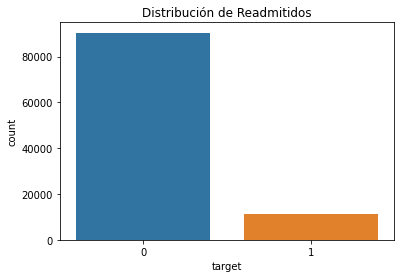

In [24]:
sns.countplot(df_diabetes['target']).set_title('Distribución de Readmitidos')

### __Insight 1__: 
En la distribución de nuestra variable objetivo se ve un gran desbalanceo de las clases.
El número de pacientes NO readmitidos (target=0) es mucho mayor que los pacientes readmitidos (target= 1)

In [25]:
### Balanceo de datos
print(sum(df_diabetes['target'].values)/len(df_diabetes['target'].values)) 

0.11160244882717688


Eso significa que solo el 11% de los pacientes son readmitidos o rehospitalizados. Además vemos el gran desbalanceo de clases.

Text(0.5, 1.0, 'Tiempo en el Hospital VS. Readmision')

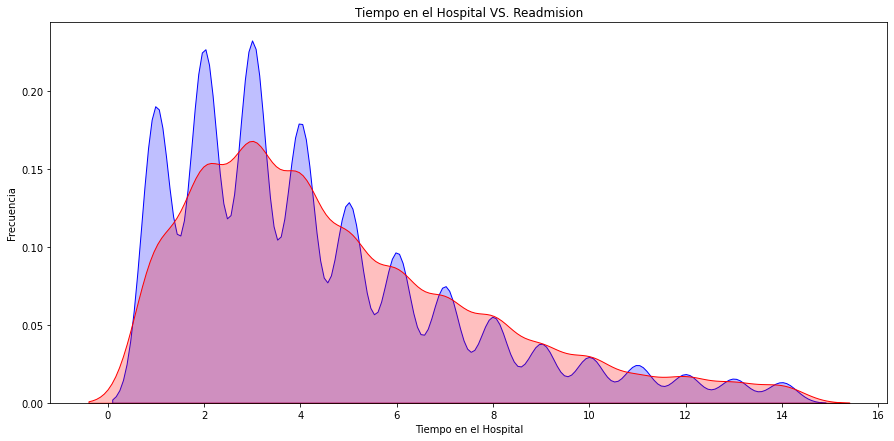

In [39]:
## Tiempo en el hospital VS Pacientes Readmitidos y NO Readmitidos
fig = plt.figure(figsize=(15,7))

ax=sns.kdeplot(df_diabetes.loc[(df_diabetes['target'] == 0),'time_in_hospital'],  color='b',shade=True, label='No Readmitido')
ax=sns.kdeplot(df_diabetes.loc[(df_diabetes['target'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitido')
ax.set(xlabel='Tiempo en el Hospital', ylabel='Frecuencia')
plt.title('Tiempo en el Hospital VS. Readmision')

### __Insight 2__: 


En la anterior gráfica vemos el comportamiento de los pacientes readmitidos (linea ROJA) y aquellos que NO fueron Readmitidos (linea AZUL).
Así mismo, nos damos cuenta que al estar más tiempo en el hospital la tasa de pacientes readmitidos disminuye.
Por otro lado, Nos damos cuenta que la mayor frecuencia de los pacientes readmitidos se da cuando el tiempo de hospitalización de los pacientes esta entre 2 y 4 días.

Text(0.5, 1.0, 'Edad del Paciente VS. Readmisión')

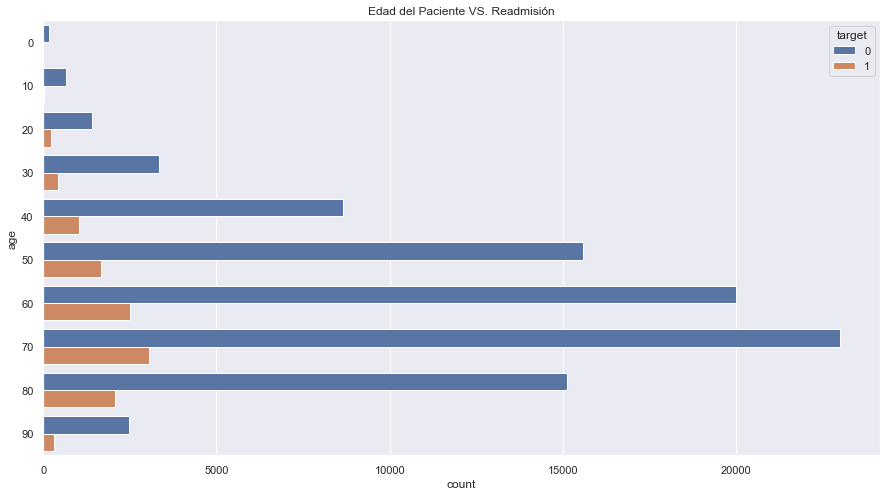

In [169]:
#Edad vs Readmisión

fig = plt.figure(figsize=(15,8))
sns.countplot(y= df_diabetes['age'], hue = df_diabetes['target']).set_title('Edad del Paciente VS. Readmisión')

### __Insight 3__: 

En la gráfica de arriba vemos que los pacientes entre los 60 y 70 años tienen mayor readmisión.

<AxesSubplot:xlabel='count', ylabel='race'>

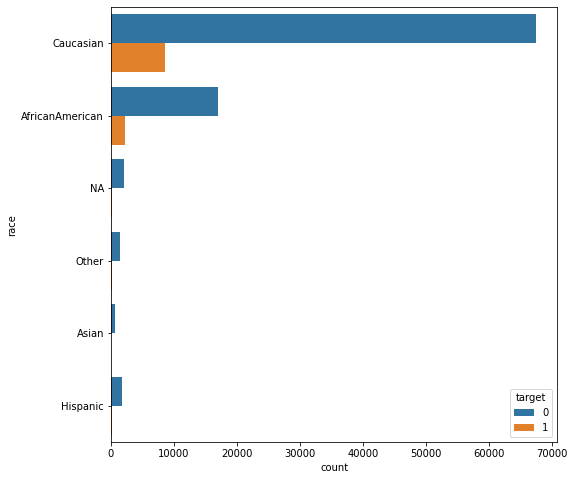

In [43]:

#Raza vs Readmisión
fig = plt.figure(figsize=(8,8))
sns.countplot(y = df_diabetes['race'], hue = df_diabetes['target'])

### __Insight 4__: 
Aquí vemos que los caucásicos son los más readmitidos.

Text(0.5, 1.0, 'Número de medicamentos Usados VS. Readmisión')

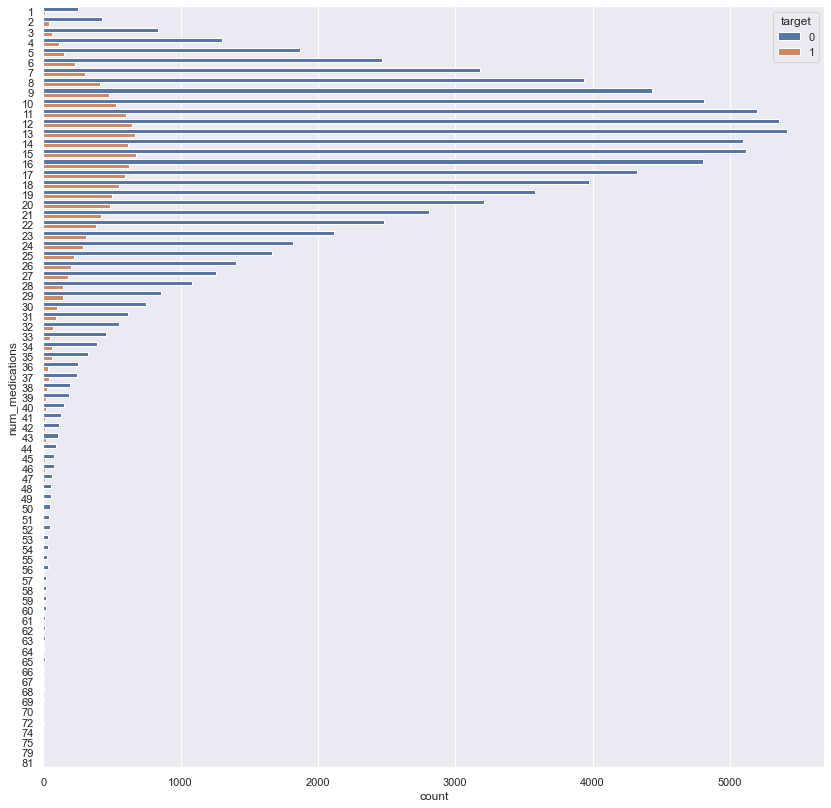

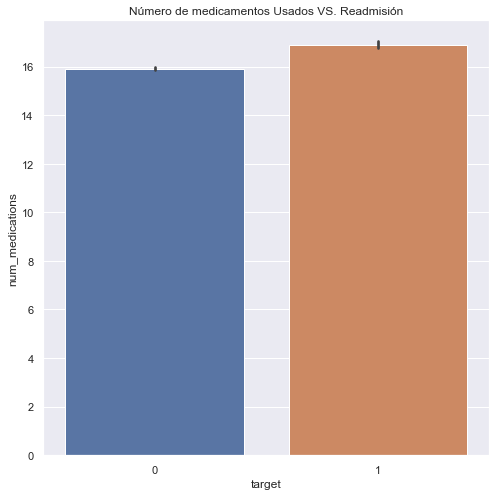

In [170]:
#numero de medicamentos usados VS. Readmisión
fig = plt.figure(figsize=(14,14))
sns.countplot(y = df_diabetes['num_medications'], hue = df_diabetes['target'])
fig = plt.figure(figsize=(8,8))
sns.barplot(x = df_diabetes['target'], y = df_diabetes['num_medications']).set_title("Número de medicamentos Usados VS. Readmisión")

### __Insight 5__: 

Si el número de medicamentos usados está entre 10 y 20 hay más probabilidad que los pacientes sean readmitidos.

Text(0.5, 1.0, 'Género del Paciente VS. Readmisión')

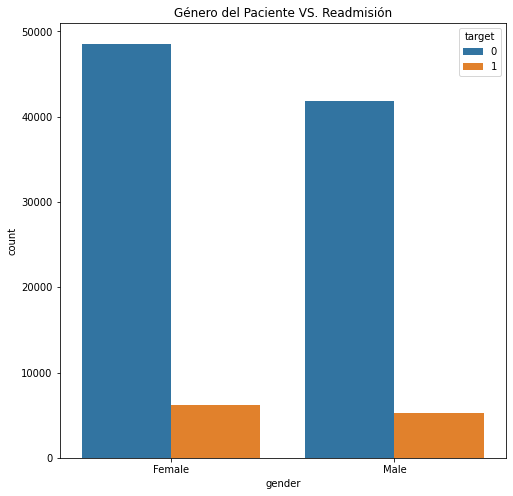

In [46]:
#Género vs Readmisión
#Masculino = 1
#Femenino = 0

fig = plt.figure(figsize=(8,8))
sns.countplot(df_diabetes['gender'], hue = df_diabetes['target']).set_title("Género del Paciente VS. Readmisión")

### __Insight 6__: 

En la gráfica anterior observamos que la tasa de readmitidos es muy similar entre hombres y mujeres.

Text(0.5, 1.0, 'Medicación para la Diabetes VS Readmisión')

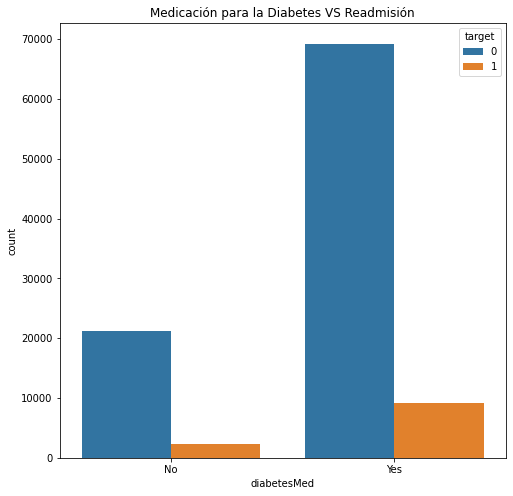

In [47]:
#Medicación diabética VS Readmisión

fig = plt.figure(figsize=(8,8))
sns.countplot(df_diabetes['diabetesMed'], hue = df_diabetes['target']).set_title('Medicación para la Diabetes VS Readmisión')

### __Insight 7__: 

Los pacientes a los cuales se les suministran medicamentos para la diabetes son aquellos que son más readmitidos.

Text(0.5, 1.0, 'Test de Glucosa en Suero VS. Readmisión')

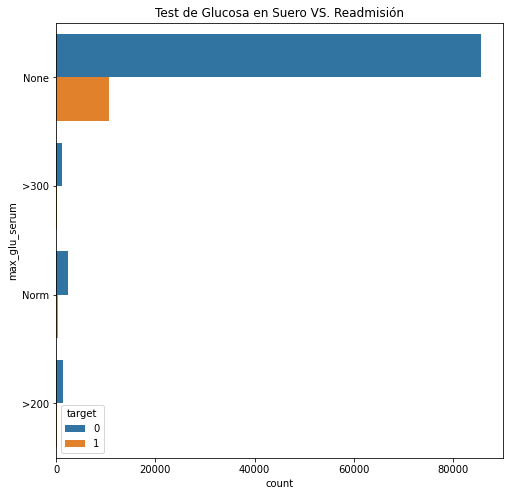

In [48]:
#Testde GLucosa en Suero (max_glue_serum) vs target
fig = plt.figure(figsize=(8,8))
sns.countplot(y = df_diabetes['max_glu_serum'], hue = df_diabetes['target']).set_title('Test de Glucosa en Suero VS. Readmisión')

### __Insight 8__: 

En la anterior gráfica observamos los resultados de los Test aplicados de glucosa en Suero. 
Este test se utiliza para determinar si los niveles de azúcar en sangre se encuentran en el rango saludable.
A menudo se utiliza para ayudar a diagnosticar y controlar la diabetes.

La lectura que se da al test es la siguiente:

'> 200': = indica diabetes.

'> 300': = indica diabetes.

'Norm': = Normal.

'None': = no se realizó la prueba.

Por tanto, observamos que los pacientes que fueron readmitidos son aquellos que NO se realizaron el test de Glucosa en Suero.

Text(0.5, 1.0, 'Resultado A1C test VS. Readmisión')

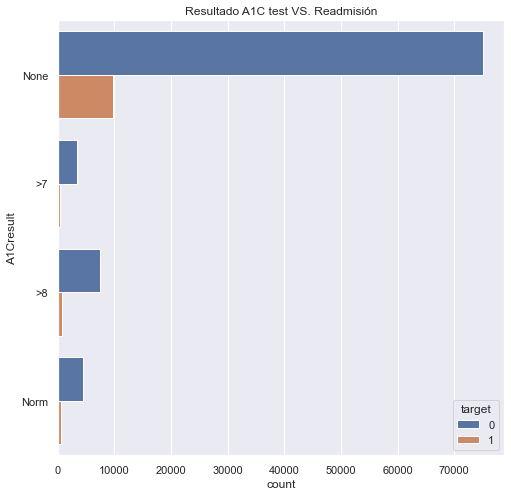

In [171]:
#Resultados del a1c test  VS target
fig = plt.figure(figsize=(8,8))
sns.countplot(y= df_diabetes['A1Cresult'], hue = df_diabetes['target']).set_title('Resultado A1C test VS. Readmisión')

### __Insight 9__: 

En la gráfica anterior vemos el Resultado de A1C test. Esta prueba de A1C es un análisis de sangre que proporciona información sobre los niveles promedio de glucosa en sangre, también llamada azúcar en sangre, durante los últimos 3 meses.

'> 7': 1.

'> 8': 1.

Norm: 0 = Normal.

None: -99 = No se tomó la prueba.

Luego de lo anterior, vemos que los pacientes que NO tomaron el test A1C son aquellos que fueron readmitidos.

Text(0.5, 1.0, 'Numero de procedimientos Lab VS. Readmisión')

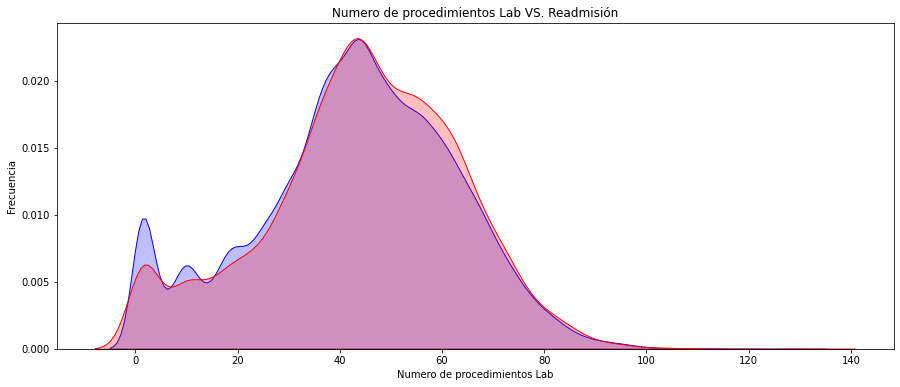

In [51]:
#numero de procedimientos de laboratorio vs target
fig = plt.figure(figsize=(15,6),)
ax=sns.kdeplot(df_diabetes.loc[(df_diabetes['target'] == 0),'num_lab_procedures'] , color='b',shade=True,label='Not readmitted')
ax=sns.kdeplot(df_diabetes.loc[(df_diabetes['target'] == 1),'num_lab_procedures'] , color='r',shade=True, label='readmitted')
ax.set(xlabel='Numero de procedimientos Lab', ylabel='Frecuencia')
plt.title('Numero de procedimientos Lab VS. Readmisión')

Vemos que el comportamiento de los procedimientos de laboratorio para ambos tipos de pacientes es muy similar.

Text(0.5, 1.0, 'Tipo de admisión_id VS. Readmisión')

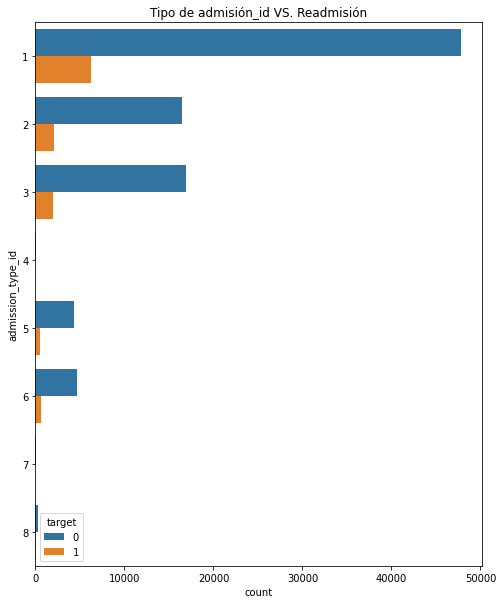

In [53]:
#Tipo de admisión vs readmisión
#1-	Emergency
#2-Urgent
#3-Elective
#4-Newborn
#5-Not Available
#6-NULL
#7-Trauma Center
#8-Not Mapped

fig = plt.figure(figsize=(8,10))
sns.countplot(y= df_diabetes['admission_type_id'], hue = df_diabetes['target']).set_title('Tipo de admisión_id VS. Readmisión')

### __Insight 10__: 

Aquí evidenciamos que los pacientes que fueron admitidos por emergencia son los que mas se han readmitido.

Text(0.5, 1.0, 'dado de alta_id VS. Readmisión')

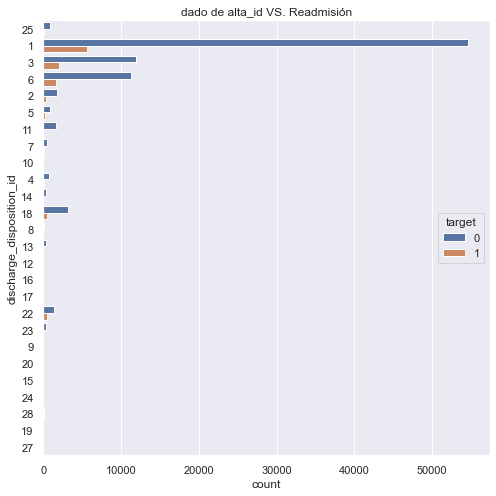

In [172]:
#Dado de alta VS. Readmisión
fig = plt.figure(figsize=(8,8))
sns.countplot(y= df_diabetes['discharge_disposition_id'], hue = df_diabetes['target']).set_title('dado de alta_id VS. Readmisión')

### __Insight 11__: 

Observamos que los pacientes que fueron dados de alta a sus casas son los que tienen mayor tasa de readmisión.

### Label encoding (Codificación de etiquetas)

En esta etapa vamos a realizar el procedimiento de codificación de etiquetas para las variables categoricas de nuestro
dataset. Y para ello vamos a seleccionar las variables categóricas.


In [56]:
categorical_feature=df_diabetes.select_dtypes(include='object')
cat=categorical_feature.columns
print(cat)

Index(['race', 'gender', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2',
       'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')


Además, eliminamos aquellas variables que tienen muchos niveles como son: diag_1, diag_2, diag_3

In [58]:
cat=['race', 'gender', 'payer_code', 'medical_specialty', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed']

In [59]:
#Copiamos en otro dataframe el dataframe llamado df_diabetes
df_diabetes2 = df_diabetes.copy()

Luego, adicionamos al conjunto de variables categóricas las variables que son numéricas y que transformamos a string y tomarlas también como categóricas: ('admission_type_id','discharge_disposition_id','admission_source_id').

Finalmente, creamos nuestras variables Dummy

In [61]:
cols_cat_num=['admission_type_id','discharge_disposition_id','admission_source_id']
df_diabetes[cols_cat_num]=df_diabetes[cols_cat_num].astype('str')
df_diabetes_cat=pd.get_dummies(df_diabetes[cat+cols_cat_num],drop_first=True)

In [63]:
print(df_diabetes_cat.columns)

Index(['race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_NA',
       'race_Other', 'gender_Male', 'payer_code_CH', 'payer_code_CM',
       'payer_code_CP', 'payer_code_DM',
       ...
       'admission_source_id_20', 'admission_source_id_22',
       'admission_source_id_25', 'admission_source_id_3',
       'admission_source_id_4', 'admission_source_id_5',
       'admission_source_id_6', 'admission_source_id_7',
       'admission_source_id_8', 'admission_source_id_9'],
      dtype='object', length=137)


In [64]:
#Borramos las columnas que hemos codificado
for i in cat:
    df_diabetes2.drop([i],axis=1,inplace=True)

In [66]:
#concatenamos las columnas codificadas y las otras columnas
df_diabetes2=pd.concat([df_diabetes2,df_diabetes_cat],axis=1)

In [67]:
#Validamos las columnas de diagnósticos
df_diabetes2['diag_3'].isnull().sum()
df_diabetes2.dropna(inplace=True)
print(df_diabetes2['diag_1'].nunique())
print(df_diabetes2['diag_2'].nunique())
print(df_diabetes2['diag_3'].nunique())

715
743
789


A continuación, vamos a clasificar algunas enfermedades descritas en las columnas de diagnostico en nuestro Dataset.

In [69]:
diag_cols = ['diag_1','diag_2','diag_3']
for col in diag_cols:
    df_diabetes2[col] = df_diabetes2[col].str.replace('E','-')
    df_diabetes2[col] = df_diabetes2[col].str.replace('V','-')
    condition = df_diabetes2[col].str.contains('250')
    df_diabetes2.loc[condition,col] = '250'

df_diabetes2[diag_cols] = df_diabetes2[diag_cols].astype(float)

Luego, creamos el grupo de enfermedades diagnosticadas

In [70]:
for col in diag_cols:
    df_diabetes2['temp']=np.nan
    
    condition = df_diabetes2[col]==250
    
    df_diabetes2.loc[condition,'temp']='Diabetes'
    
    condition = (df_diabetes2[col]>=390) & (df_diabetes2[col]<=458) | (df_diabetes2[col]==785)
    df_diabetes2.loc[condition,'temp']='Circulatory'
    
    condition = (df_diabetes2[col]>=460) & (df_diabetes2[col]<=519) | (df_diabetes2[col]==786)
    df_diabetes2.loc[condition,'temp']='Respiratory'
    
    condition = (df_diabetes2[col]>=520) & (df_diabetes2[col]<=579) | (df_diabetes2[col]==787)
    df_diabetes2.loc[condition,'temp']='Digestive'
    
    condition = (df_diabetes2[col]>=580) & (df_diabetes2[col]<=629) | (df_diabetes2[col]==788)
    df_diabetes2.loc[condition,'temp']='Genitourinary'
    
    condition = (df_diabetes2[col]>=800) & (df_diabetes2[col]<=999)
    df_diabetes2.loc[condition,'temp']='Injury'
    
    condition = (df_diabetes2[col]>=710) & (df_diabetes2[col]<=739)
    df_diabetes2.loc[condition,'temp']='Muscoloskeletal'
    
    condition = (df_diabetes2[col]>=140) & (df_diabetes2[col]<=239)
    df_diabetes2.loc[condition,'temp']='Neoplasms'
    
    condition = df_diabetes2[col]==0
    df_diabetes2.loc[condition,col]='?'
    df_diabetes2['temp']=df_diabetes2['temp'].fillna('Others')
    condition = df_diabetes2['temp']=='0'
    df_diabetes2.loc[condition,'temp']=np.nan
    df_diabetes2[col]=df_diabetes2['temp']
    df_diabetes2.drop('temp',axis=1,inplace=True)

Adicional, codificamos las columnas DIAG (Columnas Diagnóstico)

In [72]:
#Codificando DIAG_COLUMNS y creando variables Dummie
df_cat_diag=pd.get_dummies(df_diabetes2[diag_cols],drop_first=True)

#Borrando columnas codificadass
for i in diag_cols:
    df_diabetes2.drop([i],axis=1,inplace=True)

df_diabetes2=pd.concat([df_diabetes2,df_cat_diag],axis=1)

In [73]:
df_diabetes2.head(10)

,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,diag_2_Others,diag_2_Respiratory,diag_3_Diabetes,diag_3_Digestive,diag_3_Genitourinary,diag_3_Injury,diag_3_Muscoloskeletal,diag_3_Neoplasms,diag_3_Others,diag_3_Respiratory
1,10,1,1,7,3,59,0,18,0,0,...,0,0,0,0,0,0,0,0,1,0
2,20,1,1,7,2,11,5,13,2,0,...,0,0,0,0,0,0,0,0,1,0
3,30,1,1,7,2,44,1,16,0,0,...,0,0,0,0,0,0,0,0,0,0
4,40,1,1,7,1,51,0,8,0,0,...,0,0,1,0,0,0,0,0,0,0
5,50,2,1,2,3,31,6,16,0,0,...,0,0,1,0,0,0,0,0,0,0
6,60,3,1,2,4,70,1,21,0,0,...,0,0,0,0,0,0,0,0,1,0
7,70,1,1,7,5,73,0,12,0,0,...,0,1,1,0,0,0,0,0,0,0
8,80,2,1,4,13,68,2,28,0,0,...,0,0,0,0,0,0,0,0,1,0
9,90,3,3,4,12,33,3,18,0,0,...,0,0,0,0,0,0,0,0,0,1
10,40,1,1,7,9,47,2,17,0,0,...,0,0,0,0,0,1,0,0,0,0


## Creación de muestras para las etapas de Train, Test y validación:

Aqui vamos a crear 3 tipos de muestras para determinar que tan bueno es el performance de nuestro modelo con datos NO conocidos.

Muestras de entrenamiento(Train): Estas muestras se utilizan para entrenar el modelo.

Muestras de validación: Estas muestras se mantienen fuera de los datos de entrenamiento y se usan para tomar decisiones sobre cómo mejorar el modelo.

Muestras de prueba(Test): Estas muestras son fuera de todas las decisiones y se utilizan para medir el rendimiento generalizado del modelo.

Aquí vamos a dividir nuestro dataset en:

__Train__= 70%.

__Validación__= 15%

__Test__=15%.

Lo primero que vamos a realizar es mezclar (Shuffle) los datos para evitar que en nuestros datos haya algún orden.

Luego definimos el valor de "n" como el número de muestras.

__random_state__ se define para especificar que el proyecto sea reproducible. 

In [77]:
# shuffle the muestras
df_diabetes2 = df_diabetes2.sample(n = len(df_diabetes2), random_state = 42)
df_diabetes2= df_diabetes2.reset_index(drop = True)

Podemos usar la muestra nuevamente para extraer el 30% (usando frac) de los datos que se usarán para las divisiones de validación / prueba. Es importante que la validación y la prueba provengan de distribuciones similares y esta técnica es una forma de hacerlo.

In [79]:
# guardar el 30%  de los datos para validación y test  
df_valid_test=df_diabetes2.sample(frac=0.30,random_state=42)
print('Split size: %.3f'%(len(df_valid_test)/len(df_diabetes2)))

Split size: 0.300


Y ahora se divide en prueba y validación utilizando una fracción del 50%.

In [80]:
df_test = df_valid_test.sample(frac = 0.5, random_state = 42)
df_valid = df_valid_test.drop(df_test.index)

Aquí es importante saber que __.drop__ elimina las filas de __df_test__ para obtener las filas de validación.

Podemos usar esta misma idea para obtener los datos de entrenamiento.

In [81]:
# Dataos del set de entrenamiento Train
df_train_all=df_data.drop(df_valid_test.index)

En este punto, verifiquemos qué porcentaje de nuestros grupos están hospitalizados dentro de los 30 días. Esto se conoce como prevalencia.

Idealmente, los tres grupos deben tener una prevalencia similar.

In [85]:
#función que nos permite calcular la prevalencia de la variable objetivo (Target)
def calc_prevalence(y_actual):
    return (sum(y_actual)/len(y_actual))

In [86]:
print('Test prevalence(n = %d):%.3f'%(len(df_test),calc_prevalence(df_test.target.values)))
print('Valid prevalence(n = %d):%.3f'%(len(df_valid),calc_prevalence(df_valid.target.values)))
print('Train all prevalence(n = %d):%.3f'%(len(df_train_all), calc_prevalence(df_train_all.target.values)))

Test prevalence(n = 15036):0.110
Valid prevalence(n = 15036):0.113
Train all prevalence(n = 70169):0.114


Vemos que la prevalencia para las tres muestras es muy similar.

In [90]:
print('Todas las muestras (n = %d)'%len(df_diabetes2))
assert len(df_diabetes2) == (len(df_test)+len(df_valid)+len(df_train_all)),'error'

Todas las muestras (n = 100241)


### ANALISIS DE MUESTRAS DESBALANCEADAS:

En este punto,se podría decir, usemos los datos de entrenamiento en un modelo predictivo y veamos el resultado. 
Sin embargo, si hacemos esto, es posible que obtengamos un modelo con un 89% de precisión. ¡Excelente! ¡Buen trabajo! 

OJO!!: Nunca detectamos ninguna de las readmisiones (recall = 0%). 

__¿PORQUE OCURRE ESTO?__

Lo que está sucediendo es que tenemos un conjunto de datos desequilibrado donde hay muchos más negativos que positivos, por lo que el modelo podría simplemente asignar todas las muestras como negativas.

Normalmente, es mejor equilibrar los datos de alguna manera para dar más peso a los aspectos positivos. 

Hay 3 estrategias que se utilizan normalmente:

--> submuestrear la clase más dominante: utilice un subconjunto aleatorio de los negativos

--> sobremuestrear la clase desequilibrada: use las mismas muestras positivas varias veces
 
--> crear datos positivos sintéticos

Dado que tenemos algunos miles de casos positivos, vamos a utilizar el enfoque de submuestra.

Aquí, vamos a crear un conjunto de datos de entrenamiento equilibrado que tiene un 50% positivos y un 50% negativos. 

In [95]:
# Dividimos el set de entrenamiento entre positivos y negativos
rows_pos = df_train_all.target == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

# merge the balanced data
df_train = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 42)],axis = 0)

# shuffle the order of training samples 
df_train = df_train.sample(n = len(df_train), random_state = 42).reset_index(drop = True)

print('Prevalencia de datos de entrenamiento (n = %d):%.3f'%(len(df_train), calc_prevalence(df_train.target.values)))

Prevalencia de datos de entrenamiento (n = 15934):0.500


Para evitar reprocesos y ejecución de nuestros dataset de entrenamiento, test y validación los vamos a guardar:

In [97]:
df_train_all.to_csv('df_train_all.csv',index=False)
df_train.to_csv('df_train.csv',index=False)
df_valid.to_csv('df_valid.csv',index=False)
df_test.to_csv('df_test.csv',index=False)

In [103]:
X_train = df_train.drop(['target'],axis=1)
X_train_all = df_train_all.drop(['target'],axis=1)
X_valid = df_valid.drop(['target'],axis=1)

y_train = df_train['target'].values
y_valid = df_valid['target'].values

print('Training All shapes:',X_train_all.shape)
print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)

Training All shapes: (70169, 174)
Training shapes: (15934, 174) (15934,)
Validation shapes: (15036, 174) (15036,)


### ESCALAMIENTO DE VARIABLES:

Algunos modelos de aprendizaje automático tienen problemas cuando las variables son de diferente tamaño (0-100, frente a 0-1000000).
Para dar solución, podemos escalar los datos.
Aquí usaremos el Escalador estándar de scikit learn, que elimina la media y escala a la varianza de la unidad. 

In [104]:
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()
scaler.fit(X_train_all)

StandardScaler()

Además, vamos a escalar los datos de prueba y lo guardamos en un paquete llamado pickle.

In [105]:
import pickle
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [106]:
# Carga del archivo pickle
scaler = pickle.load(open(scalerfile, 'rb'))

In [107]:
#Luego, transformamos las otras matrices de los dos datasets restantes:

X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

### SELECCIÓN DEL MODELO DE CLASIFICACIÓN:

aquí vamos a entrenar varios modelos de aprendizaje automático y usamos algunas técnicas para optimizarlos. 

Luego, seleccionaremos el mejor modelo en función del rendimiento en el conjunto de validación.

Para evaluar la eficiencia de los modelos utilizados vamos a utilizar las siguientes funciones:

In [109]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity

### NOTA: 
Dado que equilibramos nuestros datos de entrenamiento, establezcamos nuestro umbral en 0.5 para etiquetar una muestra predicha como positiva.

In [110]:
thresh = 0.5

### Modelo 1: Regresión Logística

In [112]:
# Regresion logistica
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 42)
lr.fit(X_train_tf, y_train)

LogisticRegression(random_state=42)

In [114]:
y_train_preds = lr.predict_proba(X_train_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]

print('Regresion Logistica')
print('Entrenamiento:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validacion:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Regresion Logistica
Entrenamiento:
AUC:0.675
accuracy:0.624
recall:0.566
precision:0.640
specificity:0.681
prevalence:0.500
 
Validacion:
AUC:0.669
accuracy:0.657
recall:0.559
precision:0.177
specificity:0.670
prevalence:0.113
 


### Modelo 2: Decision Tree Classifier:

In [115]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree.fit(X_train_tf, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [119]:
y_train_preds = tree.predict_proba(X_train_tf)[:,1]
y_valid_preds = tree.predict_proba(X_valid_tf)[:,1]

print('Decision Tree')
print('Entrenamiento:')
tree_train_auc, tree_train_accuracy, tree_train_recall, tree_train_precision, tree_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validacion:')
tree_valid_auc, tree_valid_accuracy, tree_valid_recall, tree_valid_precision, tree_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Decision Tree
Entrenamiento:
AUC:0.734
accuracy:0.665
recall:0.665
precision:0.664
specificity:0.640
prevalence:0.500
 
Validacion:
AUC:0.673
accuracy:0.611
recall:0.659
precision:0.175
specificity:0.582
prevalence:0.113
 


### Modelo 3: Random Forest:

In [117]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

RandomForestClassifier(max_depth=6, random_state=42)

In [120]:
y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

print('Random Forest')
print('Entrenamiento:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision, rf_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validacion:')
rf_valid_auc, rf_valid_accuracy, rf_valid_recall, rf_valid_precision, rf_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Random Forest
Entrenamiento:
AUC:0.696
accuracy:0.644
recall:0.649
precision:0.642
specificity:0.638
prevalence:0.500
 
Validacion:
AUC:0.676
accuracy:0.613
recall:0.640
precision:0.173
specificity:0.610
prevalence:0.113
 


### Análisis de los modelos seleccionados:

Para identificar cual de los 3 modelos seleccionados es el mejor clasificador vamos a trazar el Área bajo la curva ROC (AUC) para evaluar el mejor modelo. 
Esta es una buena métrica de rendimiento para elegir el mejor modelo, ya que captura el equilibrio entre el verdadero positivo y el falso positivo y no requiere seleccionar un umbral.

In [128]:
df_results= pd.DataFrame({'classifier':['LR','LR','DT','DT','RF','RF'],
                           'data_set':['train','valid']*3,
                          'auc':[lr_train_auc,lr_valid_auc,tree_train_auc,tree_valid_auc,rf_train_auc,rf_valid_auc,],
                          'accuracy':[lr_train_accuracy,lr_valid_accuracy,tree_train_accuracy,tree_valid_accuracy,rf_train_accuracy,rf_valid_accuracy,],
                          'recall':[lr_train_recall,lr_valid_recall,tree_train_recall,tree_valid_recall,rf_train_recall,rf_valid_recall,],
                          'precision':[lr_train_precision,lr_valid_precision,tree_train_precision,tree_valid_precision,rf_train_precision,rf_valid_precision,],
                          'specificity':[lr_train_specificity,lr_valid_specificity,tree_train_specificity,tree_valid_specificity,rf_train_specificity,rf_valid_specificity,]})

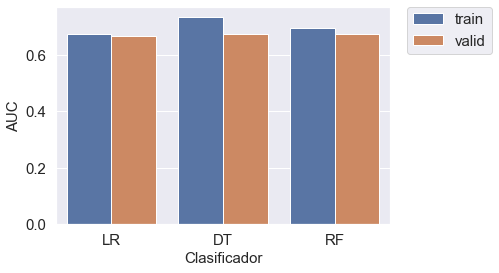

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Clasificador',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)

# Permite colocar la leyenda de la tabla por fuera del gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()

### Mejorando nuestros modelos:

Aunque nuestros modelos tienen una precisión de más del 50% vamos a utilizar la curva de aprendizaje (Learning Curve) para incrementar la capacidad de clasificación de nuestros modelos.

### Learning Curve:

Esta metodología nos permitirá conocer como funcionan nuestros modelos:

In [130]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

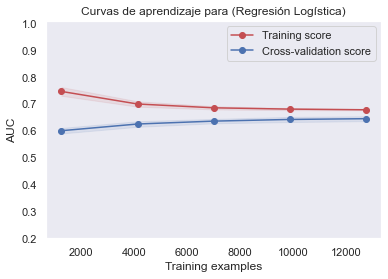

In [132]:
title = "Curvas de aprendizaje para (Regresión Logística)"
# Validación cruzada con 5 iteraciones para obtener una prueba media y un entrenamiento más suaves
# curvas de puntuación, cada vez con un 20% de datos seleccionados al azar como un conjunto de validación.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = LogisticRegression(random_state = 42)
plot_learning_curve(estimator, title, X_train_tf, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)

plt.show()

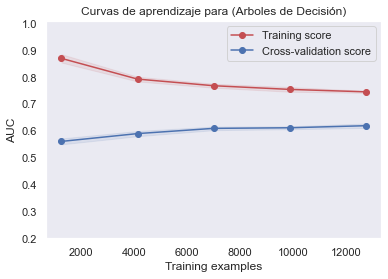

In [133]:
title = "Curvas de aprendizaje para (Arboles de Decisión)"
# Validación cruzada con 5 iteraciones para obtener una prueba media y un entrenamiento más suaves
# curvas de puntuación, cada vez con un 20% de datos seleccionados al azar como un conjunto de validación.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = DecisionTreeClassifier(max_depth = 10, random_state = 42)
plot_learning_curve(estimator, title, X_train_tf, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)

plt.show()

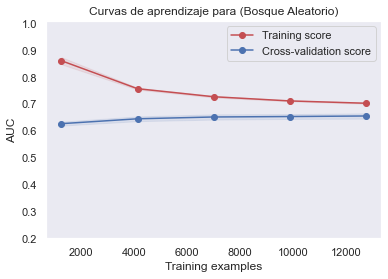

In [141]:
title = "Curvas de aprendizaje para (Bosque Aleatorio)"
# Validación cruzada con 5 iteraciones para obtener una prueba media y un entrenamiento más suaves
# curvas de puntuación, cada vez con un 20% de datos seleccionados al azar como un conjunto de validación.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = RandomForestClassifier(max_depth = 6, random_state = 42)
plot_learning_curve(estimator, title, X_train_tf, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)

plt.show()

En el casos de los 3 modelos seleccionados, podemos ver que los puntajes de entrenamiento y validación son similares pero ambos tienen puntajes bajos. Esto se llama __Sesgo alto__ y es un signo de falta de adaptación.

Dependiendo de su curva de aprendizaje, existen algunas estrategias que puede emplear para mejorar sus modelos.

__Sesgo alto__:

Agregar nuevas funciones
Incrementar la complejidad del modelo
Reducir la regularización
Cambiar la arquitectura del modelo

__Alta varianza__:

Agregar más muestras
Agregar regularización
Reducir la cantidad de funciones
Disminuir la complejidad del modelo
Agrega mejores funciones
Cambiar la arquitectura del modelo

## Importancia de las características:

Un camino para mejorar sus modelos para comprender qué características son importantes para sus modelos. Por lo general, esto solo puede investigarse para modelos más simples como Regresión logística o Bosques aleatorios.

### Importancia de las características: Regresión Logística

La regresión logística es un modelo muy interpretable porque el coeficiente de cada variable muestra cuán importante es esa variable para la predicción. Tenga en cuenta que debe haber normalizado los datos para que los coeficientes sean comparables entre las variables. Podemos extraer los coeficientes usando coef_ y almacenarlos en un nuevo marco de datos (ordenados por importancia)

In [134]:
col2use = X_train_all.columns
feature_importances = pd.DataFrame(lr.coef_[0],
                                   index = col2use,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [135]:
feature_importances.head()

,importance
rosiglitazone_No,0.556079
rosiglitazone_Steady,0.549170
number_inpatient,0.354250
discharge_disposition_id_22,0.198691
discharge_disposition_id_3,0.122547


Para la regresión logística, las variables con coeficientes positivos más altos predicen Readmitidos y las variables con coeficientes negativos más altos predicen no readmitidos. 

Ahora vamos a trazar las 50 mejores y las 50 peores a continuación.

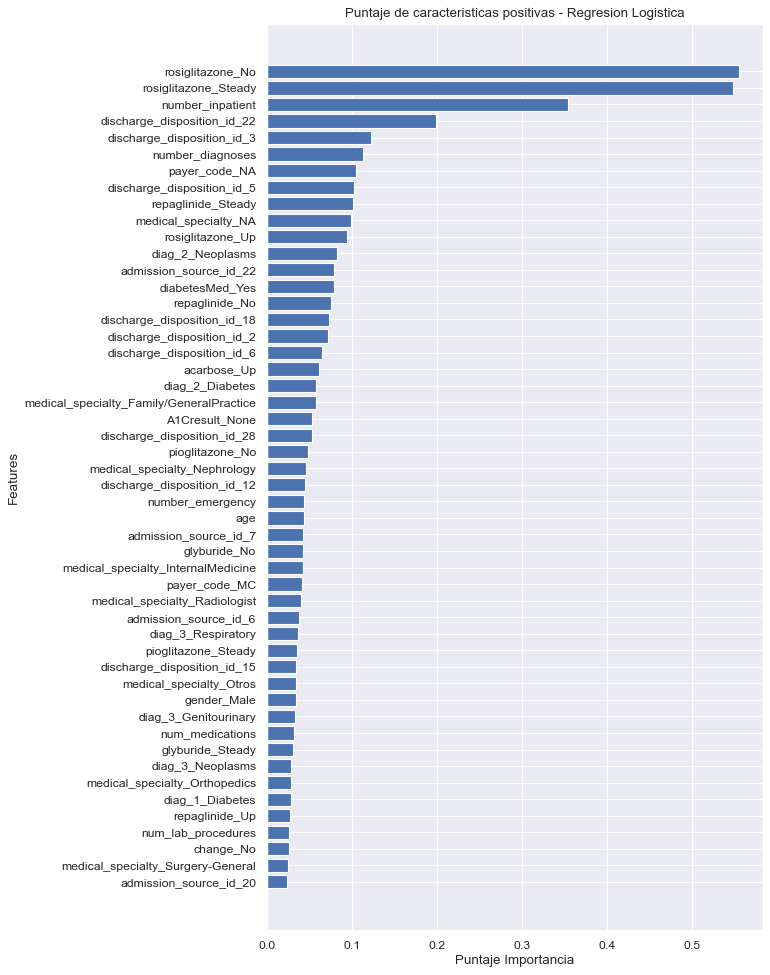

In [136]:
num = 50
ylocs = np.arange(num)
# Obtener la importancia de cada caracteristica de mayor a menor importancia
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Puntaje Importancia')
plt.title('Puntaje de caracteristicas positivas - Regresion Logistica')
plt.yticks(ylocs, feature_labels)
plt.show()

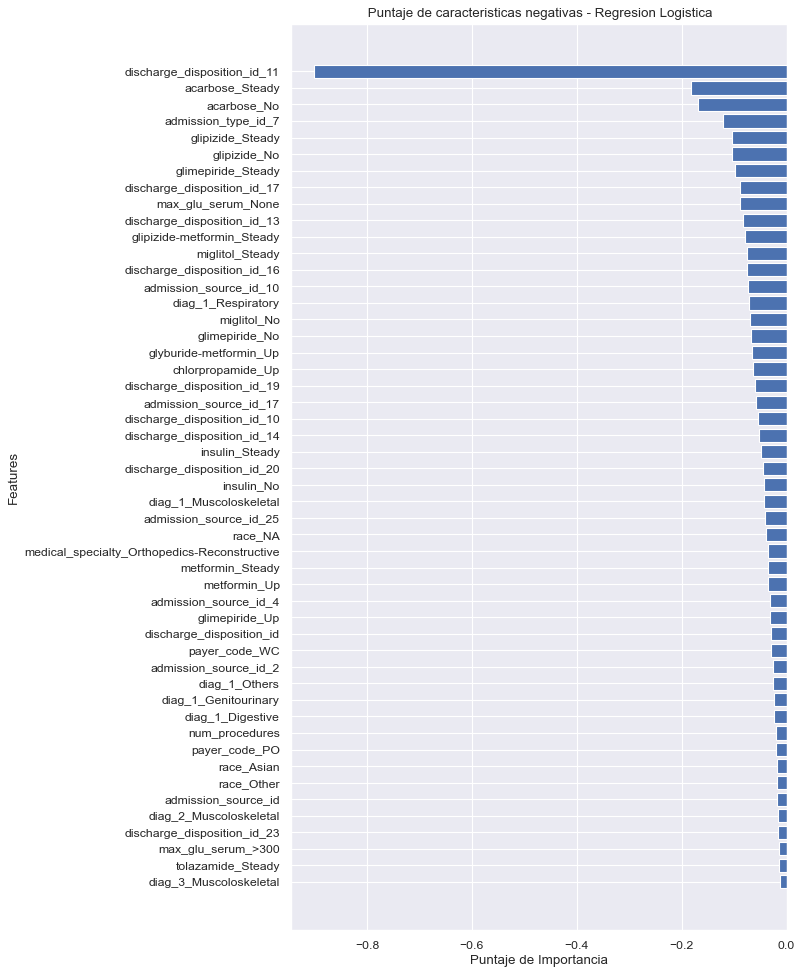

In [137]:
values_to_plot = feature_importances.iloc[-num:].values.ravel()
feature_labels = list(feature_importances.iloc[-num:].index)

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Puntaje de Importancia')
plt.title(' Puntaje de caracteristicas negativas - Regresion Logistica')
plt.yticks(ylocs, feature_labels)
plt.show()

### Importancia de las características: Bosques Aleatorios

También podemos investigar la importancia de las características para modelos de Bosques Aleatorios.

En este caso, la importancia de la función muestra la frecuencia con la que se utilizó una función en particular para dividir los datos. 
Así mismo, no sabemos si una característica en particular se correlaciona con la clase positiva o la clase negativa, sino que solo es importante para tomar una decisión.

In [138]:
col2use = X_train_all.columns
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = col2use,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [139]:
feature_importances.head()

,importance
number_inpatient,0.210455
discharge_disposition_id,0.088229
discharge_disposition_id_11,0.071029
number_emergency,0.067969
discharge_disposition_id_22,0.059757


De igual forma como en la regresión logística, las variables con coeficientes positivos más altos influyen en la toma de decisión

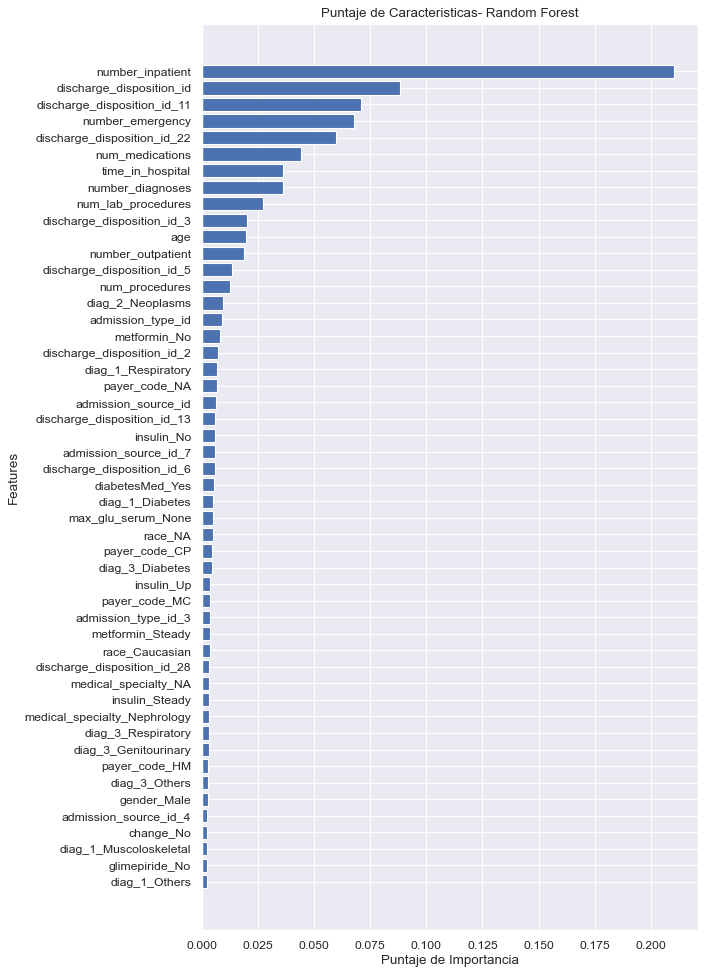

In [140]:
num = 50
ylocs = np.arange(num)
# Obtener la importancia de cada característica
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Puntaje de Importancia')
plt.title('Puntaje de Caracteristicas- Random Forest')
plt.yticks(ylocs, feature_labels)
plt.show()

Como se puede ver aquí, la mayoría de las variables importantes para el bosque aleatorio son variables continuas. Esto tiene sentido ya que puede dividir variables continuas más veces que variables categóricas.

In [174]:
col2use = X_train_all.columns
feature_importances = pd.DataFrame(tree.feature_importances_,
                                   index = col2use,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

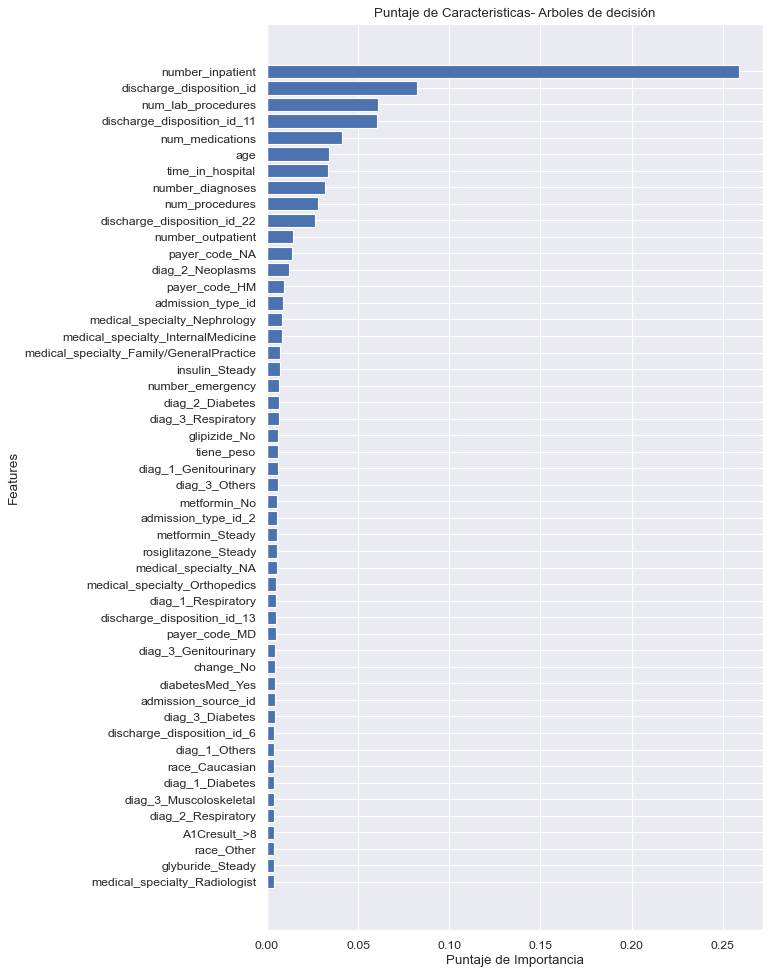

In [175]:
num = 50
ylocs = np.arange(num)
# Obtener la importancia de cada característica
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Puntaje de Importancia')
plt.title('Puntaje de Caracteristicas- Arboles de decisión')
plt.yticks(ylocs, feature_labels)
plt.show()

### Hyperparameter tuning para el modelo de Random Forest (rf)

In [144]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [146]:
#Creación de la malla (Grid) para los parámetros del modelo Bosque aleatorio

from sklearn.model_selection import RandomizedSearchCV

# numero de arboles
n_estimators = range(200,1000,200)
# Numero maximo de caracteristicas a usar por cada partición
max_features = ['auto','sqrt']
# maximum depth of the tree
max_depth = range(1,10,1)
# minimum number of samples to split a node
min_samples_split = range(2,10,2)
# criterion for evaluating a split
criterion = ['gini','entropy']

# random grid

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'criterion':criterion}

print(random_grid)

{'n_estimators': range(200, 1000, 200), 'max_features': ['auto', 'sqrt'], 'max_depth': range(1, 10), 'min_samples_split': range(2, 10, 2), 'criterion': ['gini', 'entropy']}


In [147]:
from sklearn.metrics import make_scorer, roc_auc_score
auc_scoring = make_scorer(roc_auc_score)

In [150]:
# Creamos la busqueda aleatoria (rf) para la validacion cruzada (cross-validation)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 20, cv = 2, scoring=auc_scoring,
                               verbose = 1, random_state = 42)

Tres parámetros importantes de la función __RandomizedSearchCV__ son:

puntuación = métrica de evaluación utilizada para elegir el mejor modelo
n_iter = número de combinaciones diferentes
cv = número de divisiones de validación cruzada
aumentar los dos últimos aumentará el tiempo de ejecución, pero disminuirá la posibilidad de sobreajuste. Tenga en cuenta que el número de variables y el tamaño de la cuadrícula también influyen en el tiempo de ejecución.

La validación cruzada es una técnica para dividir los datos varias veces para obtener una mejor estimación de la métrica de rendimiento. 

In [151]:
import time
t1 = time.time()
rf_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  2.4min finished


154.58504843711853


Luego, los mejores parámetros para el estimador rf son:

In [154]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 4,
 'max_features': 'sqrt',
 'max_depth': 8,
 'criterion': 'entropy'}

Aquí vamos a comparar el modelo de base para el random forest VS el Random Forest optimizado:

In [156]:
y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

print('Random Forest Base')
rf_train_auc_base = roc_auc_score(y_train, y_train_preds)
rf_valid_auc_base = roc_auc_score(y_valid, y_valid_preds)

print('Entrenamiento AUC:%.3f'%(rf_train_auc_base))
print('Validacion AUC:%.3f'%(rf_valid_auc_base))

print('Random Forest Optimizado')
y_train_preds_random = rf_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = rf_random.best_estimator_.predict_proba(X_valid_tf)[:,1]

rf_train_auc = roc_auc_score(y_train, y_train_preds_random)
rf_valid_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Entrenamiento AUC:%.3f'%(rf_train_auc))
print('Validacion AUC:%.3f'%(rf_valid_auc))

Random Forest Base
Entrenamiento AUC:0.696
Validacion AUC:0.676
Random Forest Optimizado
Entrenamiento AUC:0.725
Validacion AUC:0.691


### Evaluacion del modelo seleccionado:

Vamos a evaluar el modelo optimizado de random forest el cual se va a guardar como: "best_classifier":
Además vamos se a conocer el rendimiento del modelo probandolo con el set de testeo (test).

In [157]:
pickle.dump(rf_random.best_estimator_, open('best_classifier.pkl', 'wb'),protocol = 4)

In [159]:
X_test1 = df_test.drop(['target'],axis=1)
col2use = X_test1.columns
X_test = df_test[col2use].values
y_test = df_test['target'].values

scaler = pickle.load(open('scaler.sav', 'rb'))
X_test_tf = scaler.transform(X_test)

In [160]:
mejor_modelo = pickle.load(open('best_classifier.pkl','rb'))

In [162]:
y_train_preds = mejor_modelo.predict_proba(X_train_tf)[:,1]
y_valid_preds = mejor_modelo.predict_proba(X_valid_tf)[:,1]
y_test_preds = mejor_modelo.predict_proba(X_test_tf)[:,1]

In [163]:
thresh = 0.5

print('Entrenamiento:')
train_auc, train_accuracy, train_recall, train_precision, train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validacion:')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity = print_report(y_valid,y_valid_preds, thresh)
print('Testeo:')
test_auc, test_accuracy, test_recall, test_precision, test_specificity = print_report(y_test,y_test_preds, thresh)

Entrenamiento:
AUC:0.725
accuracy:0.665
recall:0.667
precision:0.665
specificity:0.663
prevalence:0.500
 
Validacion:
AUC:0.691
accuracy:0.625
recall:0.661
precision:0.182
specificity:0.620
prevalence:0.113
 
Testeo:
AUC:0.692
accuracy:0.628
recall:0.656
precision:0.178
specificity:0.625
prevalence:0.110
 


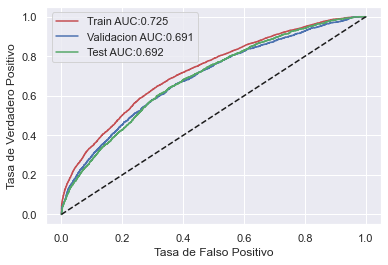

In [166]:
## Creación de la curva ROC para el modelo optimizado

from sklearn.metrics import roc_curve 

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='Validacion AUC:%.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Tasa de Falso Positivo')
plt.ylabel('Tasa de Verdadero Positivo')
plt.legend()
plt.show()

 ## CONCLUSIÓN:
 
Despues de nuestro completo Análisis exploratorio (EDA) y realizar las etapas de limpieza y preparación de datos, logramos crear un clasificador binario para predecir la probabilidad de que un paciente con diabetes sea readmitido en el hospital dentro de los 30 días. 

De acuerdo a los datos en nuestro dataset, nuestro mejor modelo tuvo un AUC de 0,725, lo cual indica que con este modelo podemos detectar el 73% de los pacientes readmitidos. 
Además,  el modelo funciona aproximadamente 1,5 veces mejor que la seleccionar pacientes al azar.

Es decir, 0.725/0.5 = 1.45.